In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('final_df.csv')

In [3]:
data

,Unnamed: 0,Date,Sentiment,Account Type,Twitter Reply Count,Twitter Retweets,Twitter Tweets,Impressions,Impact,Full Text,...,Author,Thread Entry Type,Twitter Followers,Twitter Following,Reach (new),Engagement Type,Added,tweet_without_stopwords,Text,tokenized
0,0,2020-10-31 23:57:34.0,positive,individual,0,0,81380,69194,48.7,"['RT', '@JoshMCunningham', 'They', 'not', 'rea...",...,@_ajawilson22,share,69194,799,13698,RETWEET,2021-10-06T13:31:00.824+0000,RT @JoshMCunningham They ready one 😂 😂,"['RT', '@', 'JoshMCunningham', 'They', 'ready'...","['rt', '@', 'joshmcunningham', 'they', 'readi'..."
1,1,2020-10-31 23:51:37.0,neutral,individual,1,0,81379,69194,49.7,"['Our', 'second', 'Halloween', 'costume', 'is'...",...,@_ajawilson22,post,69194,799,15098,QUOTE,2021-10-06T13:31:00.825+0000,Our second Halloween costume lowkey 🔥 @JoshMCu...,"['Our', 'second', 'Halloween', 'costume', 'low...","['our', 'second', 'halloween', 'costum', 'lowk..."
2,6,2020-10-31 23:23:40.0,positive,individual,0,0,138733,5057,22.9,"['RT', '@WatchCiWork', 'The', 'cutest', 'littl...",...,@MCJR__,share,5057,962,3071,RETWEET,2021-10-06T13:31:00.825+0000,RT @WatchCiWork The cutest little elephant eve...,"['RT', '@', 'WatchCiWork', 'The', 'cutest', 'l...","['rt', '@', 'watchciwork', 'the', 'cutest', 'l..."
3,7,2020-10-31 23:21:42.0,positive,individual,0,4,13905,2420,31.3,"['Big', 'congrats', 'to', 'my', 'Dad', '/', 'c...",...,@DonaldScott_II,post,1856,940,2475,QUOTE,2021-10-06T13:31:00.825+0000,Big congrats Dad / coach / mentor @sproff123 @...,"['Big', 'congrats', 'Dad', '/', 'coach', '/', ...","['big', 'congrat', 'dad', '/', 'coach', '/', '..."
4,8,2020-10-31 23:18:57.0,positive,individual,0,0,17784,37535,43.3,"['@eleikosf', 'Smoooooooth']",...,@mattie_rogers,reply,37535,453,10223,REPLY,2021-10-06T13:31:00.824+0000,@eleikosf Smoooooooth,"['@', 'eleikosf', 'Smoooooooth']","['@', 'eleikosf', 'smoooooooth']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166490,64696,2021-07-01 00:14:26.0,neutral,individual,0,0,142405,5949,25.7,"['@SnowfallFX', 'y', '’', 'all', 'finish', 'fi...",...,@MCJR__,post,5949,997,3473,QUOTE,2021-10-06T13:30:55.840+0000,@SnowfallFX ’ finish filming new season yet ?,"['@', 'SnowfallFX', '’', 'finish', 'filming', ...","['@', 'snowfallfx', '’', 'finish', 'film', 'ne..."
166491,64700,2021-07-01 00:09:52.0,neutral,individual,0,0,7364,1026,0.0,"['RT', '@KingJosiah54', 'How', 'NCAA', 'athlet...",...,@Annaavviiaa,share,1026,398,178,RETWEET,2021-10-06T13:30:55.844+0000,RT @KingJosiah54 How NCAA athletes walking aro...,"['RT', '@', 'KingJosiah54', 'How', 'NCAA', 'at...","['rt', '@', 'kingjosiah54', 'how', 'ncaa', 'at..."
166492,64701,2021-07-01 00:08:52.0,neutral,individual,0,0,7363,1026,0.0,"['RT', '@jshauntaee', 'my', 'definition', 'of'...",...,@Annaavviiaa,share,1026,398,178,RETWEET,2021-10-06T13:30:55.844+0000,RT @jshauntaee definition indecisive https://t...,"['RT', '@', 'jshauntaee', 'definition', 'indec...","['rt', '@', 'jshauntae', 'definit', 'indecis',..."
166493,64704,2021-07-01 00:06:25.0,positive,individual,0,0,7359,1026,0.0,"['RT', '@CharokeeYoung', 'I', 'am', 'an', 'OLY...",...,@Annaavviiaa,share,1026,398,178,RETWEET,2021-10-06T13:30:55.845+0000,RT @CharokeeYoung I OLYMPIAN 🙏🏾 💪🏾 🇯 🇲 ❤ ️ htt...,"['RT', '@', 'CharokeeYoung', 'I', 'OLYMPIAN', ...","['rt', '@', 'charokeeyoung', 'i', 'olympian', ..."


In [32]:
## topic modeling

In [33]:
import re
import pickle
import sys
from tqdm import tqdm

# Import module from gsdmm repository
sys.path.insert(0, 'gsdmm/')
from gsdmm import MovieGroupProcess

In [34]:
# Convert cleaned tweet into tokens list
data['tweet_without_stopwords'] = data.tweet_without_stopwords.apply(lambda x: re.split('\s', x))

In [47]:
# Create list of tweet tokens
docs = data['tweet_without_stopwords'].tolist()

In [48]:
docs

[['RT', '@JoshMCunningham', 'They', 'ready', 'one', '😂', '😂'],
 ['Our', 'second', 'Halloween', 'costume', 'lowkey', '🔥', '@JoshMCunningham'],
 ['RT',
  '@WatchCiWork',
  'The',
  'cutest',
  'little',
  'elephant',
  'ever',
  'see',
  '🥺',
  '🐘',
  'https://t.co/0NzU5apjjG'],
 ['Big',
  'congrats',
  'Dad',
  '/',
  'coach',
  '/',
  'mentor',
  '@sproff123',
  '@RyleXC',
  'placing',
  '3rd',
  'cross',
  'country',
  'state',
  'finals',
  '.',
  'If',
  'knew',
  'much',
  'dedicates',
  'coaching',
  'including',
  'coaching',
  'helping',
  'get',
  'I',
  'today',
  '.',
  'Keep',
  'going',
  'squad',
  'congrats',
  '👏🏾'],
 ['@eleikosf', 'Smoooooooth'],
 ['RT', '@getdisdance', 'I', '’', 'sick'],
 ['RT', '@T_Cloud4', '😂', '💀', '💀', '😂', '💀'],
 ['RT', '@the_rudis', 'November', 'https://t.co/NJHREW3ynh'],
 ['@iFlyNoWings', 'Still', 'mad', 'I', 'missed', '😩', '😭'],
 ['RT', '@_SydniePaige', '😍'],
 ['@hunterjarratt', 'Huge'],
 ['RT',
  '@juda1313',
  'God',
  'I',
  'love',
  'Hallo

In [37]:
%%time

# Train STTM model
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
# K = number of potential topic (which we don't know a priori)
# alpha = 
# beta = 
# n_iters = number of iterations to 
mgp = MovieGroupProcess(K=3, alpha=0.1, beta=0.1, n_iters=30)
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
y = mgp.fit(docs, n_terms)

In stage 0: transferred 97893 clusters with 3 clusters populated
In stage 1: transferred 71603 clusters with 3 clusters populated
In stage 2: transferred 40335 clusters with 3 clusters populated
In stage 3: transferred 18448 clusters with 3 clusters populated
In stage 4: transferred 12915 clusters with 3 clusters populated
In stage 5: transferred 11040 clusters with 3 clusters populated
In stage 6: transferred 10490 clusters with 3 clusters populated
In stage 7: transferred 10025 clusters with 3 clusters populated
In stage 8: transferred 9863 clusters with 3 clusters populated
In stage 9: transferred 9635 clusters with 3 clusters populated
In stage 10: transferred 9710 clusters with 3 clusters populated
In stage 11: transferred 9479 clusters with 3 clusters populated
In stage 12: transferred 9387 clusters with 3 clusters populated
In stage 13: transferred 9566 clusters with 3 clusters populated
In stage 14: transferred 9376 clusters with 3 clusters populated
In stage 15: transferred 92

In [38]:
%%time

# Train STTM model
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
# K = number of potential topic (which we don't know a priori)
# alpha = 
# beta = 
# n_iters = number of iterations to 
mgp1 = MovieGroupProcess(K=7, alpha=0.1, beta=0.1, n_iters=30)
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
y = mgp1.fit(docs, n_terms)

In stage 0: transferred 129720 clusters with 7 clusters populated
In stage 1: transferred 91749 clusters with 7 clusters populated
In stage 2: transferred 55184 clusters with 7 clusters populated
In stage 3: transferred 34647 clusters with 7 clusters populated
In stage 4: transferred 25644 clusters with 7 clusters populated
In stage 5: transferred 21814 clusters with 7 clusters populated
In stage 6: transferred 19955 clusters with 7 clusters populated
In stage 7: transferred 19159 clusters with 7 clusters populated
In stage 8: transferred 18418 clusters with 7 clusters populated
In stage 9: transferred 17943 clusters with 7 clusters populated
In stage 10: transferred 17930 clusters with 7 clusters populated
In stage 11: transferred 17161 clusters with 7 clusters populated
In stage 12: transferred 16747 clusters with 7 clusters populated
In stage 13: transferred 16580 clusters with 7 clusters populated
In stage 14: transferred 16510 clusters with 7 clusters populated
In stage 15: transf

In [49]:
%%time

# Train STTM model
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
# K = number of potential topic (which we don't know a priori)
# alpha = 
# beta = 
# n_iters = number of iterations to 
mgp_coping = MovieGroupProcess(K=3, alpha=0.1, beta=0.1, n_iters=30)
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
y = mgp_coping.fit(docs, n_terms)

In stage 0: transferred 99578 clusters with 3 clusters populated
In stage 1: transferred 66438 clusters with 3 clusters populated
In stage 2: transferred 33700 clusters with 3 clusters populated
In stage 3: transferred 18227 clusters with 3 clusters populated
In stage 4: transferred 13666 clusters with 3 clusters populated
In stage 5: transferred 12618 clusters with 3 clusters populated
In stage 6: transferred 12177 clusters with 3 clusters populated
In stage 7: transferred 11376 clusters with 3 clusters populated
In stage 8: transferred 11210 clusters with 3 clusters populated
In stage 9: transferred 11015 clusters with 3 clusters populated
In stage 10: transferred 10758 clusters with 3 clusters populated
In stage 11: transferred 10802 clusters with 3 clusters populated
In stage 12: transferred 10714 clusters with 3 clusters populated
In stage 13: transferred 10569 clusters with 3 clusters populated
In stage 14: transferred 10470 clusters with 3 clusters populated
In stage 15: transfe

In [50]:
%%time

# Train STTM model
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
# K = number of potential topic (which we don't know a priori)
# alpha = 
# beta = 
# n_iters = number of iterations to 
mgp_crisis = MovieGroupProcess(K=3, alpha=0.1, beta=0.1, n_iters=30)
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
y = mgp_crisis.fit(docs, n_terms)

In stage 0: transferred 97829 clusters with 3 clusters populated
In stage 1: transferred 69018 clusters with 3 clusters populated
In stage 2: transferred 41186 clusters with 3 clusters populated
In stage 3: transferred 23906 clusters with 3 clusters populated
In stage 4: transferred 15574 clusters with 3 clusters populated
In stage 5: transferred 12717 clusters with 3 clusters populated
In stage 6: transferred 11634 clusters with 3 clusters populated
In stage 7: transferred 11022 clusters with 3 clusters populated
In stage 8: transferred 11842 clusters with 3 clusters populated
In stage 9: transferred 11292 clusters with 3 clusters populated
In stage 10: transferred 10256 clusters with 3 clusters populated
In stage 11: transferred 9895 clusters with 3 clusters populated
In stage 12: transferred 9738 clusters with 3 clusters populated
In stage 13: transferred 9683 clusters with 3 clusters populated
In stage 14: transferred 9699 clusters with 3 clusters populated
In stage 15: transferred

In [51]:
%%time

# Train STTM model
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
# K = number of potential topic (which we don't know a priori)
# alpha = 
# beta = 
# n_iters = number of iterations to 
mgp_relationship = MovieGroupProcess(K=3, alpha=0.1, beta=0.1, n_iters=30)
vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
y = mgp_relationship.fit(docs, n_terms)

In stage 0: transferred 98078 clusters with 3 clusters populated
In stage 1: transferred 72268 clusters with 3 clusters populated
In stage 2: transferred 35361 clusters with 3 clusters populated
In stage 3: transferred 16410 clusters with 3 clusters populated
In stage 4: transferred 11793 clusters with 3 clusters populated
In stage 5: transferred 10191 clusters with 3 clusters populated
In stage 6: transferred 9522 clusters with 3 clusters populated
In stage 7: transferred 9195 clusters with 3 clusters populated
In stage 8: transferred 9167 clusters with 3 clusters populated
In stage 9: transferred 9007 clusters with 3 clusters populated
In stage 10: transferred 8912 clusters with 3 clusters populated
In stage 11: transferred 8875 clusters with 3 clusters populated
In stage 12: transferred 8867 clusters with 3 clusters populated
In stage 13: transferred 8977 clusters with 3 clusters populated
In stage 14: transferred 8966 clusters with 3 clusters populated
In stage 15: transferred 8916

In [52]:
# Save model
with open('dump/trained_models/10clusters.model', 'wb') as f:
    pickle.dump(mgp, f)
    f.close()

In [53]:
# Save model
with open('dump/trained_models/10clusters1.model', 'wb') as f:
    pickle.dump(mgp1, f)
    f.close()

In [54]:
# Save model
with open('dump/trained_models/10clusters_coping.model', 'wb') as f:
    pickle.dump(mgp_coping, f)
    f.close()

In [55]:
# Save model
with open('dump/trained_models/10clusters_crisis.model', 'wb') as f:
    pickle.dump(mgp_crisis, f)
    f.close()

In [56]:
# Save model
with open('dump/trained_models/10clusters_relationship.model', 'wb') as f:
    pickle.dump(mgp_relationship, f)
    f.close()

In [73]:
# Load in trained model with 10 topics 
filehandler = open('dump/trained_models/10clusters.model', 'rb')
mgp = pickle.load(filehandler)

In [75]:
filehandler = open('dump/trained_models/10clusters1.model', 'rb')
mgp_content = pickle.load(filehandler)

In [58]:
filehandler = open('dump/trained_models/10clusters_coping.model', 'rb')
mgp_coping = pickle.load(filehandler)

In [59]:
filehandler = open('dump/trained_models/10clusters_crisis.model', 'rb')
mgp_crisis = pickle.load(filehandler)

In [60]:
filehandler = open('dump/trained_models/10clusters_relationship.model', 'rb')
mgp_relationship = pickle.load(filehandler)

In [80]:
# Helper function
def top_words(cluster_word_distribution, top_cluster, mgp, values):
    '''prints the top words in each cluster'''
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — —')

In [111]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)

# Show the top 5 words in term frequency for each cluster 
topic_indices = np.arange(start=0, stop=len(doc_count), step=1)
top_words(mgp.cluster_word_distribution, topic_indices, mgp, 3)

Number of documents per topic : [40048 87512 38935]
********************
Most important clusters (by number of docs inside): [1 0 2]
********************
Cluster 0 : [('.', 39896), (',', 22792), ('!', 19064)]
 — — — — — — — — —
Cluster 1 : [('.', 59084), ('RT', 41938), ('!', 37439)]
 — — — — — — — — —
Cluster 2 : [('.', 28246), ('!', 21121), (',', 18580)]
 — — — — — — — — —


In [100]:
doc_count_content = np.array(mgp_content.cluster_doc_count)
print('Number of documents per topic :', doc_count_content)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count_content.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)

# Show the top 5 words in term frequency for each cluster 
content_indices = np.arange(start=0, stop=len(doc_count_content), step=1)
top_words(mgp_content.cluster_word_distribution, content_indices, mgp_content, 7)

Number of documents per topic : [17201 19395 15349 41135 28106 19501 25808]
********************
Most important clusters (by number of docs inside): [3 4 6 5 1 0 2]
********************
Cluster 0 : [('.', 16181), (',', 9329), ('!', 7413), ('RT', 7335), ('🇸', 6099), ('🇺', 6007), (':', 5116)]
 — — — — — — — — —
Cluster 1 : [('.', 17326), (',', 12283), ('!', 12005), ('RT', 8327), (':', 5904), ('’', 3057), ('&', 2421)]
 — — — — — — — — —
Cluster 2 : [('.', 12933), (',', 9173), ('!', 7051), ('|', 4231), (':', 4225), ('Olympic', 4004), ('@USAWrestling', 3585)]
 — — — — — — — — —
Cluster 3 : [('I', 15108), ('RT', 14372), ('’', 14237), ('.', 12498), ('😂', 12430), ('!', 10073), (',', 5813)]
 — — — — — — — — —
Cluster 4 : [('!', 26899), ('RT', 13129), ('.', 6715), ('️', 6109), (',', 4334), ('’', 4163), ('❤', 3179)]
 — — — — — — — — —
Cluster 5 : [('.', 19985), (',', 10474), ('RT', 9587), ('!', 9313), (':', 3722), (')', 3319), ('(', 3247)]
 — — — — — — — — —
Cluster 6 : [('.', 41588), (',', 22375

In [101]:
doc_count_coping = np.array(mgp_coping.cluster_doc_count)
print('Number of documents per topic :', doc_count_coping)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count_coping.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)

# Show the top 5 words in term frequency for each cluster 
coping_indices = np.arange(start=0, stop=len(doc_count_coping), step=1)
top_words(mgp_coping.cluster_word_distribution, coping_indices, mgp_coping, 3)

Number of documents per topic : [38071 78047 50377]
********************
Most important clusters (by number of docs inside): [1 2 0]
********************
Cluster 0 : [('.', 37825), (',', 22413), ('!', 18392)]
 — — — — — — — — —
Cluster 1 : [('.', 48428), ('RT', 36281), ('!', 30196)]
 — — — — — — — — —
Cluster 2 : [('.', 40973), ('!', 29036), (',', 26758)]
 — — — — — — — — —


In [102]:
doc_count_crisis = np.array(mgp_crisis.cluster_doc_count)
print('Number of documents per topic :', doc_count_crisis)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count_crisis.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)

# Show the top 5 words in term frequency for each cluster 
crisis_indices = np.arange(start=0, stop=len(doc_count_crisis), step=1)
top_words(mgp_crisis.cluster_word_distribution, crisis_indices, mgp_crisis, 3)

Number of documents per topic : [41739 83305 41451]
********************
Most important clusters (by number of docs inside): [1 0 2]
********************
Cluster 0 : [('.', 44111), (',', 29822), ('RT', 23823)]
 — — — — — — — — —
Cluster 1 : [('.', 49530), ('RT', 38303), ('!', 36017)]
 — — — — — — — — —
Cluster 2 : [('.', 33585), ('!', 21281), (',', 18794)]
 — — — — — — — — —


In [103]:
doc_count_relationship = np.array(mgp_relationship.cluster_doc_count)
print('Number of documents per topic :', doc_count_relationship)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count_relationship.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)

# Show the top 5 words in term frequency for each cluster 
relationship_indices = np.arange(start=0, stop=len(doc_count_relationship), step=1)
top_words(mgp_relationship.cluster_word_distribution, relationship_indices, mgp_relationship, 3)

Number of documents per topic : [50997 30887 84611]
********************
Most important clusters (by number of docs inside): [2 0 1]
********************
Cluster 0 : [('.', 49780), (',', 32254), ('RT', 27564)]
 — — — — — — — — —
Cluster 1 : [('.', 24639), ('!', 14998), (',', 14030)]
 — — — — — — — — —
Cluster 2 : [('.', 52807), ('RT', 39900), ('!', 36863)]
 — — — — — — — — —


In [112]:
# Helper function
def cluster_importance(mgp):
    '''returns a word-topic matrix[phi] where each value represents
    the word importance for that particular cluster; 
    phi[i][w] would be the importance of word w in topic i.
    '''
    n_z_w = mgp.cluster_word_distribution
    beta, V, K = mgp.beta, mgp.vocab_size, mgp.K
    phi = [{} for i in range(K)]        
    for z in range(K):
        for w in n_z_w[z]:
            phi[z][w] = (n_z_w[z][w]+beta)/(sum(n_z_w[z].values())+V*beta)
    return phi

In [115]:
# Helper function(s)
def get_topic_name(doc, topic_dict):
    '''returns the topic name string value from a dictionary of topics'''
    topic_desc = topic_dict[doc]
    return topic_desc

def get_content_name(doc, content):
    '''returns the topic name string value from a dictionary of topics'''
    content_desc = content[doc]
    return content_desc

def get_coping_name(doc, coping):
    '''returns the topic name string value from a dictionary of topics'''
    coping_desc = coping[doc]
    return coping_desc

def get_crisis_name(doc, crisis):
    '''returns the topic name string value from a dictionary of topics'''
    crisis_desc = crisis[doc]
    return crisis_desc

def get_relationship_name(doc, relationship):
    '''returns the topic name string value from a dictionary of topics'''
    relationship_desc = relationship[doc]
    return relationship_desc

def topic_allocation(df, docs, mgp, mgp_content, mgp_coping, mgp_crisis, mgp_relationship, topic_dict, content_dict, coping_dict, crisis_dict, relationship_dict):
    '''allocates all topics to each document in original dataframe,
    adding two columns for cluster number and cluster description'''
    topic_allocations = []
    content_allocations = []
    coping_allocations = []
    crisis_allocations = []
    relationship_allocations = []
    
    for doc in tqdm(docs):
        topic_label, score = mgp.choose_best_label(doc)
        topic_allocations.append(topic_label)
        
    for doc in tqdm(docs):
        content_label, score = mgp_content.choose_best_label(doc)
        content_allocations.append(content_label)
        
    for doc in tqdm(docs):
        coping_label, score = mgp_coping.choose_best_label(doc)
        coping_allocations.append(coping_label)
        
    for doc in tqdm(docs):
        crisis_label, score = mgp_crisis.choose_best_label(doc)
        crisis_allocations.append(crisis_label)
        
    for doc in tqdm(docs):
        relationship_label, score = mgp_relationship.choose_best_label(doc)
        relationship_allocations.append(relationship_label)

    df['dominant_topic'] = topic_allocations
    df['dominant_content'] = content_allocations
    df['dominant_coping'] = coping_allocations
    df['dominant_crisis'] = crisis_allocations
    df['dominant_relationship'] = relationship_allocations
    
    df['topic_name'] = df.dominant_topic.apply(lambda x: get_topic_name(x, topic_dict))
    df['content'] = df.dominant_content.apply(lambda x: get_content_name(x, content_dict))
    df['coping'] = df.dominant_coping.apply(lambda x: get_coping_name(x, coping_dict))
    df['crisis'] = df.dominant_crisis.apply(lambda x: get_crisis_name(x, crisis_dict))
    df['relationship'] = df.dominant_relationship.apply(lambda x: get_relationship_name(x, relationship_dict))
    print('Complete. Number of documents with topic allocated: {}'.format(len(df)))    

In [116]:
# Define dictionary topics in same sequential order 
# based on clusters and word distributions in STTM model above

topic_dict = {}
content_dict = {}
coping_dict = {}
crisis_dict = {}
relationship_dict = {}

topic_names = ['Informing', 'marketing', 'activating']
content_names = ['Celebration and empowerment', 'athlete safety', 'prevention', 'COVID', 'postpone Olympics', 'mental wellness', 'physical wellness/health']
coping_names = ['Emotional coping', 'cognitive coping', 'action']
crisis_names = ['Rejection', 'acceptance', 'fighting']
relationship_names = ['Professional', 'personal', 'community']

for i, topic_num in enumerate(topic_indices):
    topic_dict[topic_num]=topic_names[i]

for i, content_num in enumerate(content_indices):
    content_dict[content_num]=content_names[i]
    
for i, coping_num in enumerate(coping_indices):
    coping_dict[coping_num]=coping_names[i]    
    
for i, crisis_num in enumerate(crisis_indices):
    crisis_dict[crisis_num]=crisis_names[i]
    
for i, relationship_num in enumerate(relationship_indices):
    relationship_dict[relationship_num]=relationship_names[i]
    
# Allocate topics to original dataframe 
topic_allocation(data, docs, mgp, mgp_content, mgp_coping, mgp_crisis, mgp_relationship, topic_dict, content_dict, coping_dict, crisis_dict, relationship_dict)

100%|████████████████████████████████████████████████████████████████████████| 166495/166495 [00:21<00:00, 7739.32it/s]


Complete. Number of documents with topic allocated: 166495


In [154]:
data.drop('Unnamed: 0',axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [121]:
data.to_csv('data.csv')

In [122]:
data.to_excel('data.xlsx')

In [123]:
## sentiment

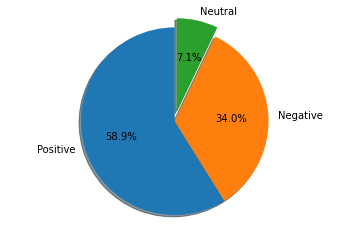

In [35]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [15, 30, 45, 10]
explode = (0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(data['Sentiment'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('sentiment.jpg')

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace=True)

In [6]:
## topic

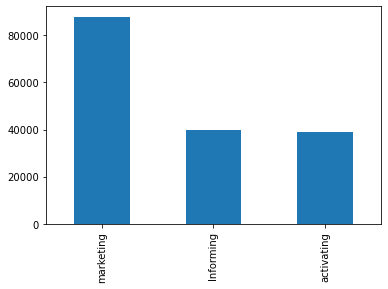

In [23]:
data['topic_name'].value_counts().plot.bar()
plt.savefig('topic.jpg')

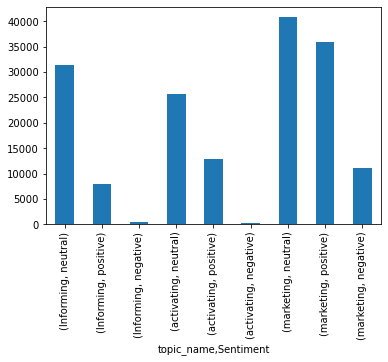

In [24]:
data.groupby(['topic_name'])['Sentiment'].value_counts().plot.bar()
plt.savefig('topic_sentiment.jpg')

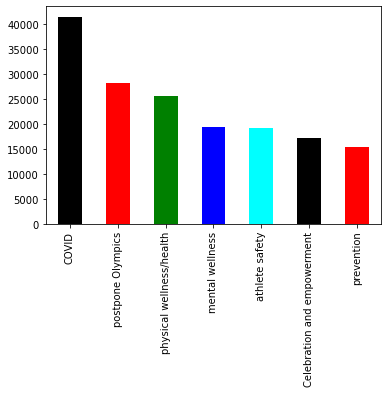

In [25]:
data['content'].value_counts().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.savefig('content.jpg')

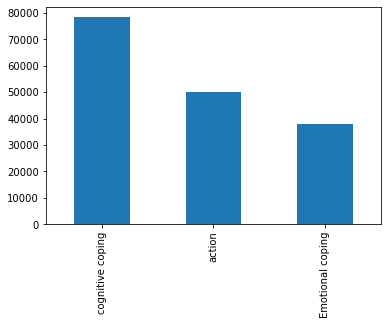

In [26]:
data['coping'].value_counts().plot.bar()
plt.savefig('coping.jpg')

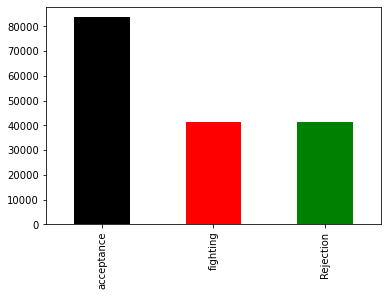

In [27]:
data['crisis'].value_counts().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.savefig('crisis.jpg')

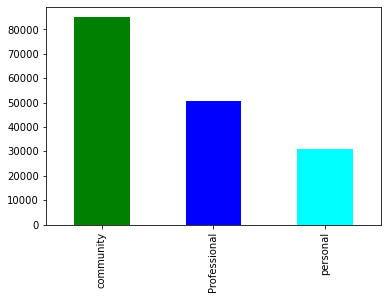

In [28]:
data['relationship'].value_counts().plot.bar(color=['green', 'blue', 'cyan'])
plt.savefig('relationship.jpg')

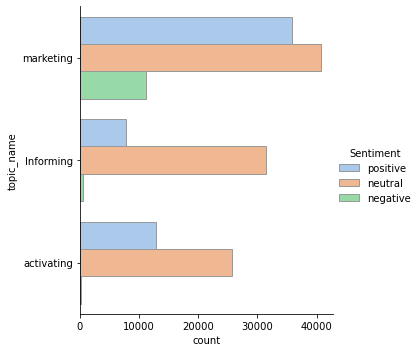

In [30]:
sns.catplot(y="topic_name", hue="Sentiment", kind="count",
            palette="pastel", edgecolor=".6",
            data=data, height=5)
plt.savefig('topic_sentiment1.jpg')

In [228]:
from matplotlib import rcParams

<Figure size 2880x360 with 0 Axes>

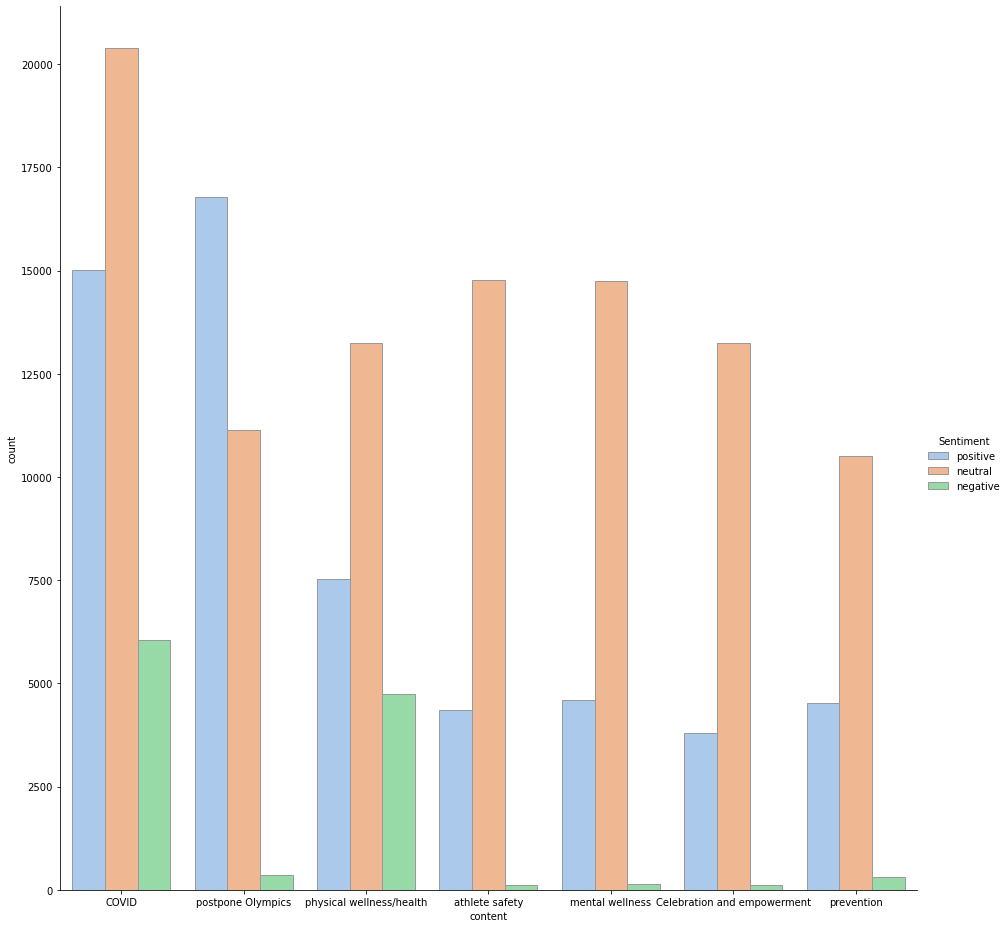

In [36]:
plt.figure(figsize=(40, 5))
sns.catplot(x="content", hue="Sentiment", kind="count",
            palette="pastel", edgecolor=".6",
            data=data, height=13)

plt.savefig('content_sentimenttt.jpg')

In [253]:
data

,Date,Sentiment,Account Type,Twitter Reply Count,Twitter Retweets,Twitter Tweets,Impressions,Impact,Full Text,Mentioned Authors,...,topic_name,num_clusters,dominant_content,dominant_coping,dominant_crisis,dominant_relationship,content,coping,crisis,relationship
0,2020-10-31 23:57:34.0,positive,individual,0,0,81380,69194,48.7,"['RT', '@JoshMCunningham', 'They', 'not', 'rea...",@joshmcunningham,...,marketing,3,3,1,1,2,COVID,cognitive coping,acceptance,community
1,2020-10-31 23:51:37.0,neutral,individual,1,0,81379,69194,49.7,"['Our', 'second', 'Halloween', 'costume', 'is'...",@joshmcunningham,...,marketing,3,3,1,1,2,COVID,cognitive coping,acceptance,community
2,2020-10-31 23:23:40.0,positive,individual,0,0,138733,5057,22.9,"['RT', '@WatchCiWork', 'The', 'cutest', 'littl...",@watchciwork,...,marketing,3,4,1,1,2,postpone Olympics,cognitive coping,acceptance,community
3,2020-10-31 23:21:42.0,positive,individual,0,4,13905,2420,31.3,"['Big', 'congrats', 'to', 'my', 'Dad', '/', 'c...","@sproff123, @rylexc",...,marketing,3,6,1,0,2,physical wellness/health,cognitive coping,Rejection,community
4,2020-10-31 23:18:57.0,positive,individual,0,0,17784,37535,43.3,"['@eleikosf', 'Smoooooooth']",@eleikosf,...,marketing,3,3,1,1,2,COVID,cognitive coping,acceptance,community
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166490,2021-07-01 00:14:26.0,neutral,individual,0,0,142405,5949,25.7,"['@SnowfallFX', 'y', '’', 'all', 'finish', 'fi...",@snowfallfx,...,marketing,3,3,1,1,2,COVID,cognitive coping,acceptance,community
166491,2021-07-01 00:09:52.0,neutral,individual,0,0,7364,1026,0.0,"['RT', '@KingJosiah54', 'How', 'NCAA', 'athlet...",@kingjosiah54,...,marketing,3,6,1,1,2,physical wellness/health,cognitive coping,acceptance,community
166492,2021-07-01 00:08:52.0,neutral,individual,0,0,7363,1026,0.0,"['RT', '@jshauntaee', 'my', 'definition', 'of'...",@jshauntaee,...,marketing,3,4,1,1,2,postpone Olympics,cognitive coping,acceptance,community
166493,2021-07-01 00:06:25.0,positive,individual,0,0,7359,1026,0.0,"['RT', '@CharokeeYoung', 'I', 'am', 'an', 'OLY...",@charokeeyoung,...,marketing,3,4,1,1,2,postpone Olympics,cognitive coping,acceptance,community


In [8]:
import datetime as dt

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data['month'] = data['Date'].dt.month

In [11]:
data1 = data[data['Sentiment']=='Positive']